<a href="https://colab.research.google.com/github/vnscience/DataMining/blob/main/KPDL_BTH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Câu 1: Ôn tập và chuẩn bị dữ liệu

In [ ]:
# import thư viện cần thiết
import pandas as pd
# 1.1 Tải bộ dữ liệu
url = "https://github.com/anhdung98/diem_thi_2024/releases/download/240717/diem_thi_thpt_2024.csv"
df = pd.read_csv(url)
df.info()
df_sample = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  int64  
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


In [ ]:
df_sample.rename(columns={
    'sbd'       : 'ID',
    'toan'      : 'Toan',
    'ngu_van'   : 'Ngu Van',
    'vat_li'    : 'Vat Ly',
    'hoa_hoc'   : 'Hoa Hoc',
    'sinh_hoc'  : 'Sinh Hoc',
    'lich_su'   : 'Lich Su',
    'dia_li'    : 'Dia Ly',
    'gdcd'      : 'GDCD',
    'ngoai_ngu'  : 'Ngoai Ngu',
    'ma_ngoai_ngu' : 'Ma NN'
}, inplace=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ID         1061605 non-null  int64  
 1   Toan       1045613 non-null  float64
 2   Ngu Van    1050101 non-null  float64
 3   Ngoai Ngu  912705 non-null   float64
 4   Vat Ly     345615 non-null   float64
 5   Hoa Hoc    346518 non-null   float64
 6   Sinh Hoc   342378 non-null   float64
 7   Lich Su    706214 non-null   float64
 8   Dia Ly     704682 non-null   float64
 9   GDCD       583609 non-null   float64
 10  Ma NN      912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


In [ ]:
# 1.2 Lấy mẫu ngẫu nhiên 50000 thí sinh
df_sample = df_sample.sample(n=50000, random_state=42)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 407987 to 297775
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         50000 non-null  int64  
 1   Toan       49253 non-null  float64
 2   Ngu Van    49482 non-null  float64
 3   Ngoai Ngu  43100 non-null  float64
 4   Vat Ly     16253 non-null  float64
 5   Hoa Hoc    16300 non-null  float64
 6   Sinh Hoc   16112 non-null  float64
 7   Lich Su    33286 non-null  float64
 8   Dia Ly     33220 non-null  float64
 9   GDCD       27581 non-null  float64
 10  Ma NN      43100 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
df_sample.head(10)

,ID,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Ma NN
407987,21000217,6.8,8.50,7.6,NaN,NaN,NaN,8.50,8.25,9.00,N4
140909,2033085,4.4,4.00,4.6,NaN,NaN,NaN,7.50,8.00,7.25,N1
81222,1081804,5.8,7.50,3.0,NaN,NaN,NaN,5.75,7.75,8.00,N1
430762,21023084,3.0,5.25,NaN,NaN,NaN,NaN,3.00,6.25,NaN,NaN
424308,21016597,7.2,8.00,6.2,6.75,7.75,5.00,NaN,NaN,NaN,N1
608849,30010686,5.8,8.25,4.2,NaN,NaN,NaN,9.25,9.50,9.25,N1
964732,54013109,7.4,8.00,5.4,6.50,5.00,8.00,NaN,NaN,NaN,N1
240223,5006121,3.0,6.25,2.2,NaN,NaN,NaN,4.25,5.75,7.00,N1
957000,54005363,5.2,7.00,4.0,NaN,NaN,NaN,5.75,6.75,7.50,N1
551277,28028509,6.4,8.00,4.2,5.50,6.75,5.75,NaN,NaN,NaN,N1


In [ ]:
# 1.3. Liet ke cot tinh diem
score_cols = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']

# Câu 2: Biến đổi Dữ liệu sang dạng giao dịch (transaction)

In [ ]:
df_sample[score_cols] = df_sample[score_cols].fillna(0)

In [ ]:
df_sample.head(10)

,ID,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Ma NN
407987,21000217,6.8,8.50,7.6,0.00,0.00,0.00,8.50,8.25,9.00,N4
140909,2033085,4.4,4.00,4.6,0.00,0.00,0.00,7.50,8.00,7.25,N1
81222,1081804,5.8,7.50,3.0,0.00,0.00,0.00,5.75,7.75,8.00,N1
430762,21023084,3.0,5.25,0.0,0.00,0.00,0.00,3.00,6.25,0.00,NaN
424308,21016597,7.2,8.00,6.2,6.75,7.75,5.00,0.00,0.00,0.00,N1
608849,30010686,5.8,8.25,4.2,0.00,0.00,0.00,9.25,9.50,9.25,N1
964732,54013109,7.4,8.00,5.4,6.50,5.00,8.00,0.00,0.00,0.00,N1
240223,5006121,3.0,6.25,2.2,0.00,0.00,0.00,4.25,5.75,7.00,N1
957000,54005363,5.2,7.00,4.0,0.00,0.00,0.00,5.75,6.75,7.50,N1
551277,28028509,6.4,8.00,4.2,5.50,6.75,5.75,0.00,0.00,0.00,N1


In [ ]:
transactions = []

for index, row in df_sample.iterrows():
    subjects = [col for col in score_cols if row[col] > 1.0]
    transactions.append(subjects)

transactions[:5]

[['Toan', 'Ngu Van', 'Ngoai Ngu', 'Lich Su', 'Dia Ly', 'GDCD'],
 ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Lich Su', 'Dia Ly', 'GDCD'],
 ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Lich Su', 'Dia Ly', 'GDCD'],
 ['Toan', 'Ngu Van', 'Lich Su', 'Dia Ly'],
 ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc']]

In [ ]:
#2.3 Chuyển đổi sang dạng One hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

df_trans.head(5)

,Dia Ly,GDCD,Hoa Hoc,Lich Su,Ngoai Ngu,Ngu Van,Sinh Hoc,Toan,Vat Ly
0,True,True,False,True,True,True,False,True,False
1,True,True,False,True,True,True,False,True,False
2,True,True,False,True,True,True,False,True,False
3,True,False,False,True,False,True,False,True,False
4,False,False,True,False,True,True,True,True,True


# Câu 3: Khai thác tập phổ biến với Apriori

In [ ]:
# 3.1 & 3.2 Import thư viện và áp dụng thuật toán Apriori
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_trans, min_support=0.5, use_colnames=True)

#3.3 In kết quả các tập phổ biến
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
4,0.98942,(Ngu Van)
5,0.98504,(Toan)
20,0.97460,"(Ngu Van, Toan)"
3,0.86184,(Ngoai Ngu)
19,0.86118,"(Toan, Ngoai Ngu)"
...,...,...
57,0.54326,"(GDCD, Dia Ly, Toan, Lich Su, Ngoai Ngu)"
54,0.54316,"(Ngu Van, GDCD, Toan, Ngoai Ngu)"
61,0.54314,"(Ngu Van, GDCD, Toan, Lich Su, Ngoai Ngu)"
59,0.54312,"(Ngu Van, GDCD, Dia Ly, Toan, Ngoai Ngu)"


In [ ]:
import matplotlib.pyplot as plt

# Trực quan hóa 15 dòng đầu tiên của frequent itemsets

top_sets = frequent_itemsets.sort_values(by='support', ascending=False).head(15)

top_sets


,support,itemsets
4,0.98942,(Ngu Van)
5,0.98504,(Toan)
20,0.97460,"(Ngu Van, Toan)"
3,0.86184,(Ngoai Ngu)
19,0.86118,"(Toan, Ngoai Ngu)"
18,0.85916,"(Ngu Van, Ngoai Ngu)"
40,0.85854,"(Ngu Van, Toan, Ngoai Ngu)"
2,0.66564,(Lich Su)
16,0.66520,"(Ngu Van, Lich Su)"
0,0.66424,(Dia Ly)


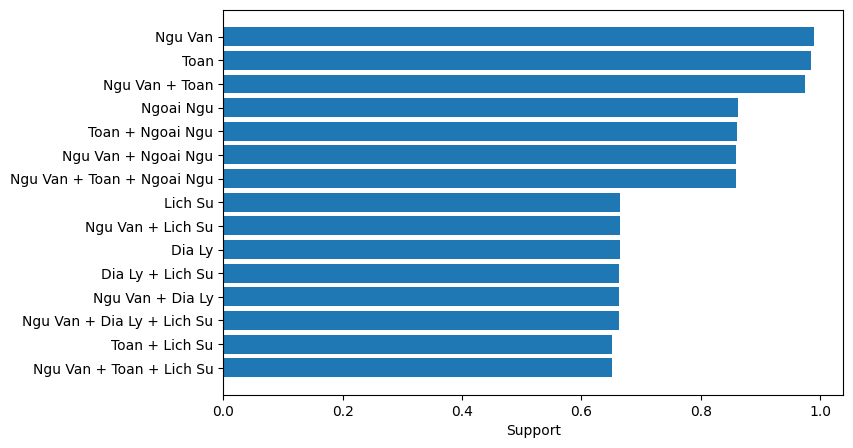

In [ ]:
plt.figure(figsize=(8,5))
plt.barh([' + '.join(i) for i in top_sets['itemsets']], top_sets['support'])
plt.xlabel('Support')
plt.gca().invert_yaxis()
plt.show()

# Câu 4: Sinh và phân tích Luật kết hợp

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("5 luật kết hợp có Lift cao nhất (với Confidence >= 70%):")
rules.sort_values(by='lift', ascending=False).head(5)

5 luật kết hợp có Lift cao nhất (với Confidence >= 70%):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
458,"(GDCD, Toan)","(Ngu Van, Dia Ly, Lich Su, Ngoai Ngu)",0.54954,0.54460,0.54312,0.988318,1.814759,1.0,0.243841,38.981389,0.996676,0.985663,0.974347,0.992800
428,"(Ngu Van, Dia Ly, Lich Su, Ngoai Ngu)","(GDCD, Toan)",0.54460,0.54954,0.54312,0.997282,1.814759,1.0,0.243841,165.757105,0.985864,0.985663,0.993967,0.992800
307,"(GDCD, Toan)","(Dia Ly, Lich Su, Ngoai Ngu)",0.54954,0.54480,0.54326,0.988572,1.814560,1.0,0.243871,39.832899,0.996542,0.985810,0.974895,0.992873
304,"(Dia Ly, Lich Su, Ngoai Ngu)","(GDCD, Toan)",0.54480,0.54954,0.54326,0.997173,1.814560,1.0,0.243871,159.357538,0.986165,0.985810,0.993725,0.992873
452,"(Dia Ly, Lich Su, Ngoai Ngu)","(Ngu Van, GDCD, Toan)",0.54480,0.54940,0.54312,0.996916,1.814555,1.0,0.243807,146.123143,0.986161,0.985556,0.993156,0.992743
